***The purpose of this notebook is three-fold:***
- discover more about the data
- mess around with some functions to ensure that there isn't too much unecessary code in the final report
- determine which research questions are workable

**Proposed Questions:**
1. Are patients who book their appointments well in advance more likely to attend them?
2. Are certain age groups more likely to miss their appointments?
3. Do SMS prompts increase the likelihood of patients attending their appointments?
4. What are the highest risk factors among patients?
5. Do certain neighbourhoods experience higher no-shows?
6. Are scholarship beneficiaries more or less likely to attend appointments?
7. Are the scholarship beneficiaries located more in specific areas?

**Objectives**\ $most likely to be deleted$
\
I believe that investigating this data set would generate insights that may help the Brazilian government achieve objectives such as:
 1. Assessing the distribution of the [Bosla Famila] () programme.
 2. Understanding the health-risk factors of certain populations.
 3. Planning the disbursement of medical equipment and personnel in proportion to risk factors.
 4. Improving or creating other social programmes for the population.

In [144]:
import pandas as pd
import numpy as np
df = pd.read_csv('NoShowApp.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
sum(df.duplicated()) #check for duplicates in data

0

In [6]:
df.isnull().sum() #check for nulls

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.shape #check number of entries

(110527, 14)

In [8]:
df.info() #confirm number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
df['AppointmentID'].nunique() #check which variable (between patientID and appointmentID) will be more likely to be unique

110527

In [12]:
df['PatientId'].nunique() #check which variable (between patientID and appointmentID) will be more likely to be unique

62299

In [13]:
df['Neighbourhood'].nunique() #check the number of neighbourhoods

81

In [14]:
df['Neighbourhood'].value_counts() #check the number of entries for each neighbourhood

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [18]:
df['Neighbourhood'].value_counts().median() #check media to see if there is a category we can use for prevalent neighbourhoods in the dataset

851.0

In [19]:
schol=df.query('Scholarship==1') #check out the data for patients in the scholaship programme

In [21]:
schol['Neighbourhood'].value_counts() #check neighbourhoods where the scholarship programme is most prevalent

ILHA DO PRÍNCIPE     579
TABUAZEIRO           537
RESISTÊNCIA          468
CARATOÍRA            456
SANTA MARTHA         441
                    ... 
UNIVERSITÁRIO          5
MONTE BELO             5
DE LOURDES             5
PONTAL DE CAMBURI      5
NAZARETH               2
Name: Neighbourhood, Length: 73, dtype: int64

In [22]:
schol['Neighbourhood'].value_counts().median()

115.0

In [77]:
schol_2 = df[(df['No-show'] == "Yes") & (df['Scholarship'] == 1)] #check out info about appointments that were no-shows and also signed up for the scholarship programme
schol_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 17 to 110482
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       2578 non-null   float64
 1   AppointmentID   2578 non-null   int64  
 2   Gender          2578 non-null   object 
 3   ScheduledDay    2578 non-null   object 
 4   AppointmentDay  2578 non-null   object 
 5   Age             2578 non-null   int64  
 6   Neighbourhood   2578 non-null   object 
 7   Scholarship     2578 non-null   int64  
 8   Hipertension    2578 non-null   int64  
 9   Diabetes        2578 non-null   int64  
 10  Alcoholism      2578 non-null   int64  
 11  Handcap         2578 non-null   int64  
 12  SMS_received    2578 non-null   int64  
 13  No-show         2578 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 302.1+ KB


In [76]:
schol_3 = df[(df['No-show'] == "Yes") & (df['Scholarship'] == 0)] #check info for appointments that were no shows and are not part of the scholarship programme
schol_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19741 entries, 6 to 110516
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       19741 non-null  float64
 1   AppointmentID   19741 non-null  int64  
 2   Gender          19741 non-null  object 
 3   ScheduledDay    19741 non-null  object 
 4   AppointmentDay  19741 non-null  object 
 5   Age             19741 non-null  int64  
 6   Neighbourhood   19741 non-null  object 
 7   Scholarship     19741 non-null  int64  
 8   Hipertension    19741 non-null  int64  
 9   Diabetes        19741 non-null  int64  
 10  Alcoholism      19741 non-null  int64  
 11  Handcap         19741 non-null  int64  
 12  SMS_received    19741 non-null  int64  
 13  No-show         19741 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 2.3+ MB


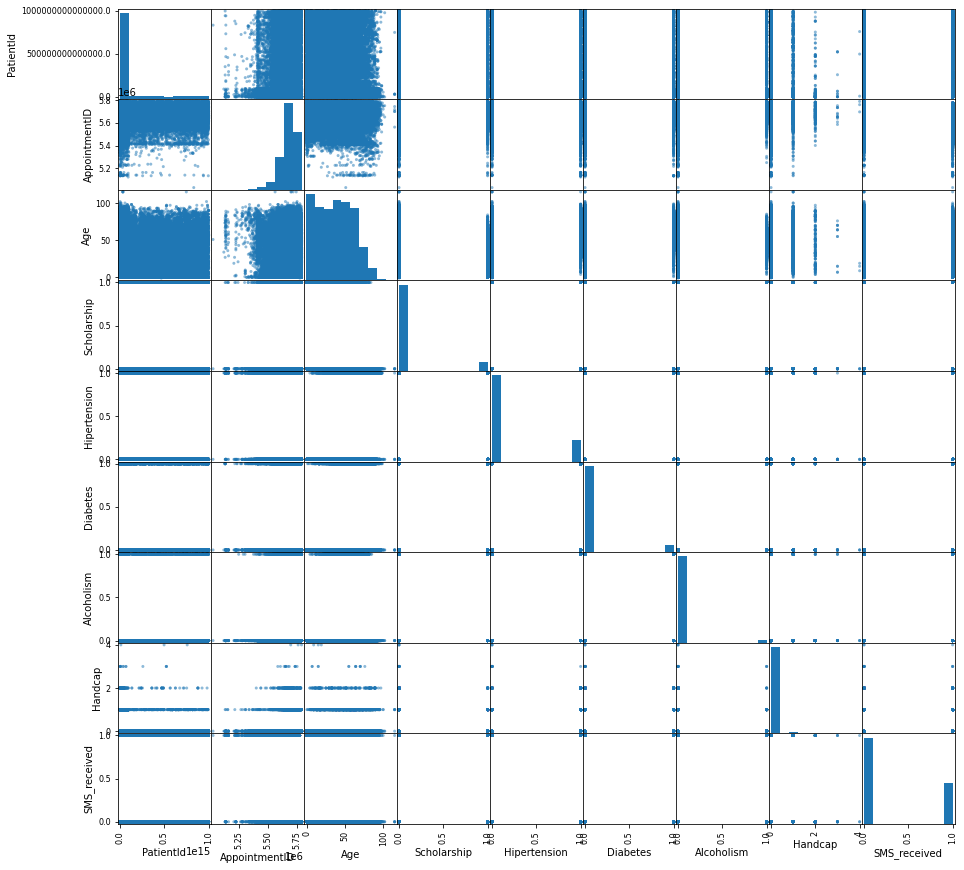

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(15, 15));

In [85]:
df['Hipertension'].value_counts() #confirm number of appointments (all) where the patients had hypertension

0    88726
1    21801
Name: Hipertension, dtype: int64

In [86]:
df['Diabetes'].value_counts()        #confirm number of appointments(all) where the patients had diabetes

0    102584
1      7943
Name: Diabetes, dtype: int64

In [87]:
df['Alcoholism'].value_counts() #confirm number of appointments(all) where the patients had diabetes

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [88]:
df['Handcap'].value_counts() #confirm number of appointments(all) where the patients had a handicap, we can see there are 4 levels of handicaps

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [97]:
H = df['Hipertension'].value_counts() #confirm that we can put this info in a vector
H[1]


21801

In [99]:
Ha = df['Handcap'].value_counts() #check if we can add the vectors to get the total number of handicap-related appointments
print(Ha[1] + Ha[2] +Ha[3])


2238


In [100]:
2042 + 183 + 13 #confirm the number above is the same when we manually ass the figures in the output from Cell88

2238

In [101]:
H = df['Hipertension'].value_counts() #Map the diseases to different variables to plot them. The general syntax is df[1], apart fromt eh handicap
D = df['Diabetes'].value_counts()
A = df['Alcoholism'].value_counts()
Ha_1 = df['Handcap'].value_counts() #here, we have two variables for Hypertension. This one is the initial function to count the no. of appointments
Ha = Ha_1[1] + Ha_1[2] +Ha_1[3] #this one contains the total number of handicap-related appointments by adding the different levels

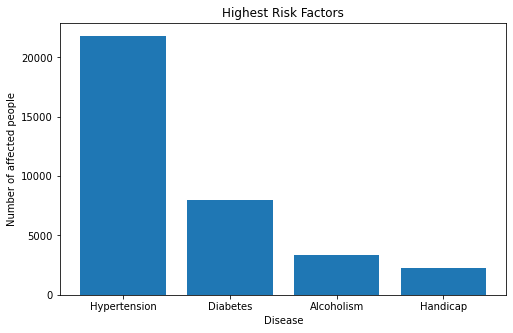

In [103]:
plt.subplots(figsize=(8, 5))
plt.bar(("Hypertension", "Diabetes","Alcoholism","Handicap"),[H[1], D[1], A[1], Ha])
plt.title('Highest Risk Factors')
plt.xlabel('Disease')
plt.ylabel('Number of appointments');
#We can make this plot more accurate by only counting unique patient IDs as opposed to appointments, or plotting both and seeing the differences.

In [119]:
df.head() #appointment id col is now deleted.

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [120]:
H = df['Hipertension'].value_counts() #Map the diseases to different variables to plot them. The general syntax is df[1], apart fromt eh handicap
D = df['Diabetes'].value_counts()
A = df['Alcoholism'].value_counts()
Ha_1 = df['Handcap'].value_counts() #here, we have two variables for Hypertension. This one is the initial function to count the no. of appointments
Ha = Ha_1[1] + Ha_1[2] +Ha_1[3]

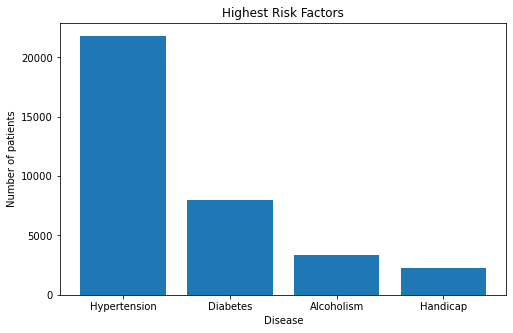

In [121]:
plt.subplots(figsize=(8, 5))
plt.bar(("Hypertension", "Diabetes","Alcoholism","Handicap"),[H[1], D[1], A[1], Ha])
plt.title('Highest Risk Factors')
plt.xlabel('Disease')
plt.ylabel('Number of patients');

In [122]:
H = df['Hipertension'].value_counts() #confirm that we can put this info in a vector
H[1]

21801

In [123]:
#The numebr should not be the same, so we confirm if the number of rows is equal to teh number of patient ids, it shouldn't be

df['PatientId'].nunique()

62299

In [141]:
#drop duplucate patient ids, in new df

df['PatientId'].drop_duplicates(inplace=False)

0         2.987250e+13
1         5.589978e+14
2         4.262962e+12
3         8.679512e+11
4         8.841186e+12
              ...     
110512    9.876246e+13
110513    8.674778e+13
110518    7.263315e+13
110520    9.969977e+14
110524    1.557663e+13
Name: PatientId, Length: 62299, dtype: float64

In [143]:
df.shape #unable to coimpute this, list as limitation

(110527, 13)

In [146]:
#Sms prompts and attending appts N.B rerun beginning code to restore df to include appt id.
sms = df[(df['SMS_received'] == 1) & (df['Scholarship'] == 1)] 
sms.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
33,7.653517e+12,5616921,F,2016-04-25T15:01:04Z,2016-04-29T00:00:00Z,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
52,7.987570e+14,5534639,F,2016-03-31T17:06:17Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes
62,3.647762e+13,5614045,F,2016-04-25T10:01:13Z,2016-04-29T00:00:00Z,3,CONQUISTA,1,0,0,0,0,1,No


In [149]:
sms_1 = (sms['No-show'] == "Yes")
sms_2 =(sms['No-show'] == "No")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 3505).

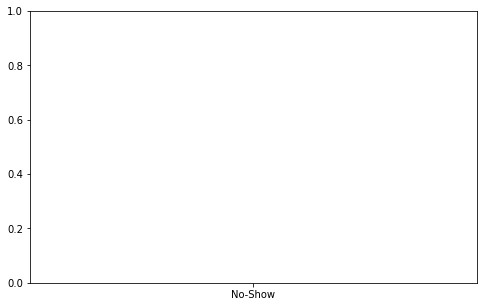

In [150]:
plt.subplots(figsize=(8, 5))
plt.bar(("No-Show", "Attended Appointment"),[sms_1, sms_2])
plt.title('Number of appointments where SMS was received vs. Appt Attended')
plt.xlabel('Attended')
plt.ylabel('Sms Received');

In [156]:
sms = df[(df['SMS_received'] == 1)]
sms.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,9.994839e+10,5620206,F,2016-04-26T08:47:27Z,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26T10:54:18Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No


In [109]:
appts = sms['No-show'].value_counts()
print(appts[1])

NameError: name 'sms' is not defined

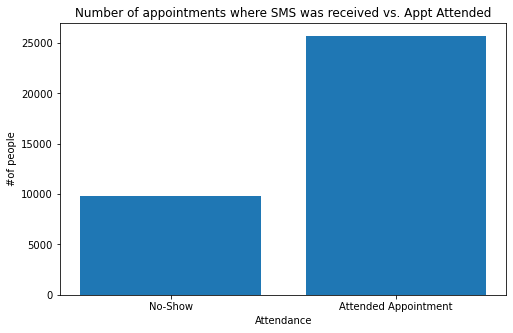

In [165]:
plt.subplots(figsize=(8, 5))
plt.bar(("No-Show", "Attended Appointment"),[appts[1], appts[0]])
plt.title('Number of appointments where SMS was received vs. Appt Attended')
plt.xlabel('Attendance')
plt.ylabel('#of people');

In [4]:
#now we can plots the same vis-a-vis where no sms was received..then calc propoprtion


In [5]:
#Need to reload pacakges and code to be able to continue with analysis.

NameError: name 'df' is not defined

In [88]:
import pandas as pd
import numpy as np
df = pd.read_csv('NoShowApp.csv')
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
#how to parse date-time dt as datetime, from the code in the beginning, we can see its currently an object.
#cahnge schedule day and appoint day to date-time
df['ScheduledDay'].value_counts()

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [8]:
#since its an int, we can convert to date-time
#new df to avoid errors
df1 = df
df1['ScheduledDay'] = pd.to_datetime(df1['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ') #in this code, we need to ensure the format is exactly as it is in the dataframe

In [9]:
df1.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [10]:
df1.info() #confirmed it worked, repeat for the appt day, because we need to try out the diff/time function.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  object        
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

In [11]:
df1['AppointmentDay'] = pd.to_datetime(df1['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')

In [12]:
df1.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [14]:
#here, we can see that there were only dates provided, I had seen the 00:00:00 and assumed the first 10 appointments were at midnight, but we can clearly see the apointment time was not recorded. Diff time is therefore not something we can calulate.

In [16]:
#we can try to calculate number of days between appts.
df1['num_days'] = (df1['AppointmentDay'] - df1['ScheduledDay']).dt.days

In [17]:
df1.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,num_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1


In [20]:
#negative result doesn't make sense so lets remove the time part for now
df2 = df
df2['ScheduledDay'] = pd.to_datetime(df2['ScheduledDay'], format='%Y-%m-%d')
df2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#the best solution is to concatenate the ScheduledDay and Appointment day, separate the time into a different column and then calculate the difference.
#This is too complex give the time constraint so that question will also be discounted.

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [24]:
df2.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64

In [45]:
pats = np.array(df2.PatientId.value_counts())

In [47]:
print(pats)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64


In [48]:
pats.describe

<bound method NDFrame.describe of 8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64>

In [49]:
df2.drop_duplicates(subset=["PatientId"], keep=False)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27 15:15:06+00:00,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03 07:51:47+00:00,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [52]:
df2.drop_duplicates(subset=["PatientId"], keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [53]:
df2.drop_duplicates(['PatientId'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110512,9.876246e+13,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27 15:15:06+00:00,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03 07:51:47+00:00,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No


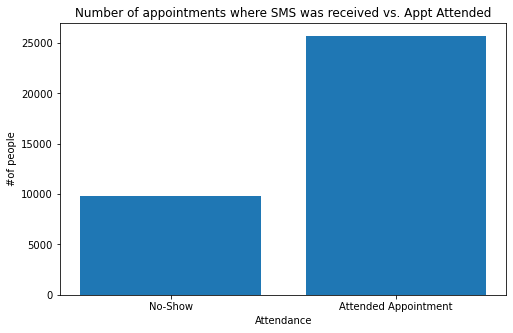

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sms2 = df2[(df2['SMS_received'] == 1)]
appts2 = sms2['No-show'].value_counts()
plt.subplots(figsize=(8, 5))
plt.bar(("No-Show", "Attended Appointment"),[appts2[1], appts2[0]])
plt.title('Number of appointments where SMS was received vs. Appt Attended')
plt.xlabel('Attendance')
plt.ylabel('#of people');

In [57]:
#interesting that the numbers are exactly the same...why?

In [59]:
sms2 = df2[(df2['SMS_received'] == 1)]
sms2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29T00:00:00Z,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29T00:00:00Z,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,8.632298e+14,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes
25,5.819370e+12,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No


In [60]:
appts2 = sms2['No-show'].value_counts()
appts2[1]

9784

In [61]:
#because it gives the exact value, Im not sure why that could be, but I am free toeither work with appt.ID or Patient ID


In [62]:
#it could be that because only certain patients have their sms alert on, OR the sms alert is sent when a patient is late?
#Let's see if this affect the numbers of diseases.

In [63]:
H2 = df2['Hipertension'].value_counts() #Map the diseases to different variables to plot them. The general syntax is df[1], apart fromt eh handicap
D2 = df2['Diabetes'].value_counts()
A2 = df2['Alcoholism'].value_counts()
Ha_2 = df2['Handcap'].value_counts() #here, we have two variables for Hypertension. This one is the initial function to count the no. of appointments
Ha2 = Ha_2[1] + Ha_2[2] +Ha_2[3] #this one contains the total number of handicap-related appointments by adding the different levels

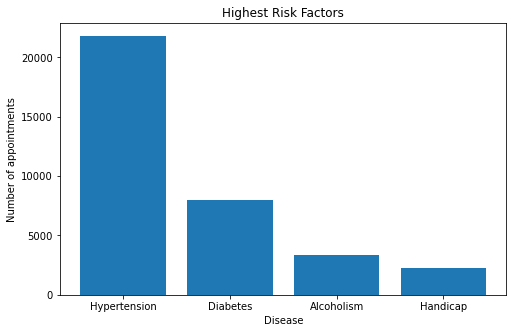

In [64]:
plt.subplots(figsize=(8, 5))
plt.bar(("Hypertension", "Diabetes","Alcoholism","Handicap"),[H2[1], D2[1], A2[1], Ha2])
plt.title('Highest Risk Factors')
plt.xlabel('Disease')
plt.ylabel('Number of appointments');

In [66]:
print([H2[1], D2[1], A2[1], Ha2])

[21801, 7943, 3360, 2238]


In [67]:
#the numbers are exactly the same. So given that paientId and Appointment ID (together, or having only one, do not affect the data, I'll remove both columns)

In [69]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [72]:
df.Age.min() #let's find the -1 age because it's invalid data

-1

In [74]:
df.query('Age<=0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [ ]:
#this is an observation that needs to be deleted.
df.query('Age<=0') #this query returns 2450 rows, meaning a lot of patients are infants or under 1 years old. SO we can use 0 as the starting number.

In [80]:
df2.drop(['Age<0'], axis=1, inplace=True)

KeyError: "['Age<0'] not found in axis"

In [89]:
df1=df
df1.drop(df1[df1['Age'] < 0].index, inplace = True)

In [90]:
df1.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [95]:
#save that function into a df to call it later
ages = (df1.Age.describe())

In [96]:
age_groups = [ages[3], ages[4], ages[5], ages[6], ages[7]]
age_group_names = ['0-18 yrs', '19-37 yrs', '38-55 yrs', '56-115 yrs']

In [97]:
df1['Age Categories'] = pd.cut(df1['Age'], age_groups, labels=age_group_names)
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age Categories
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,56-115 yrs
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,56-115 yrs
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,56-115 yrs
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18 yrs
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,56-115 yrs


In [99]:
no_shows = df1[(df1['No-show'] == "Yes")]

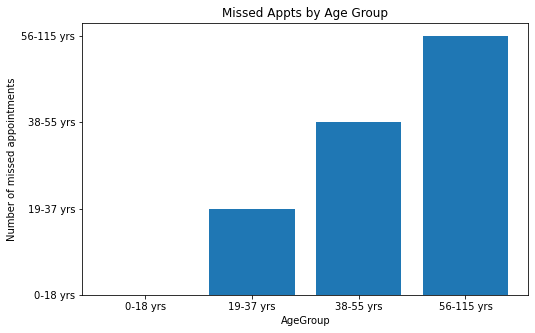

In [102]:
plt.subplots(figsize=(8, 5))
plt.bar(("0-18 yrs", "19-37 yrs", "38-55 yrs", "56-115 yrs"),['0-18 yrs', '19-37 yrs', '38-55 yrs', '56-115 yrs'])
plt.title('Missed Appts by Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Number of missed appointments');

In [103]:
#wrong plot

In [117]:
no_shows = df1[(df1['No-show'] == "Yes")]
print(age_data = no_shows['Age Categories'].value_counts())


TypeError: 'age_data' is an invalid keyword argument for print()

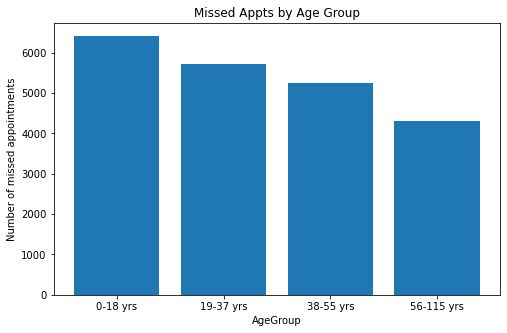

In [116]:
plt.subplots(figsize=(8, 5))
plt.bar(("0-18 yrs", "19-37 yrs", "38-55 yrs", "56-115 yrs"),[age_data[0], age_data[1], age_data[2], age_data[3]])
plt.title('Missed Appts by Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Number of missed appointments');

In [111]:
no_shows = df1[(df1['No-show'] == "Yes")]
print(no_shows['Age Categories'].value_counts())

19-37 yrs     6414
0-18 yrs      5708
38-55 yrs     5255
56-115 yrs    4303
Name: Age Categories, dtype: int64


In [115]:
def val_count(col1['Age Categories'].value_counts()):
    print(col1['Age Categories'].value_counts())
val_count(no_shows)
    


SyntaxError: invalid syntax (3954689546.py, line 1)